In [1]:
# class ActNode:
#     """actions as nodes"""
#     def __init__(self,name,pre=None,eff=None):
#         self.name = name
#         self.pre = pre if pre is not None else {}
#         self.eff = eff if eff is not None else {}
#         self.link_to={}
#         # a dictionary with keys representing the to action and values representing weight
#     def add_linkneighbor(self, action):
#         if action in self.link_to:
#             self.link_to[action] += 1
#         else:
#             self.link_to[action] = 1


# class Digraph:
#     def __init__(self):
#         self.actions={}
#         self.lastaction=None
#     def add_newaction(self,name,pre=None,eff=None):
#         if not self.actions:
#             #the actions is empty
#             self.actions[name] = ActNode(name,pre,eff)
#             self.lastaction = self.actions[name]
#         else:
#             if name not in self.actions:
#                 self.actions[name] = ActNode(name, pre, eff)
            
#             self.lastaction.add_linkneighbor(self.actions[name])
#             self.lastaction = self.actions[name]

               
            
            
            
        
    
    

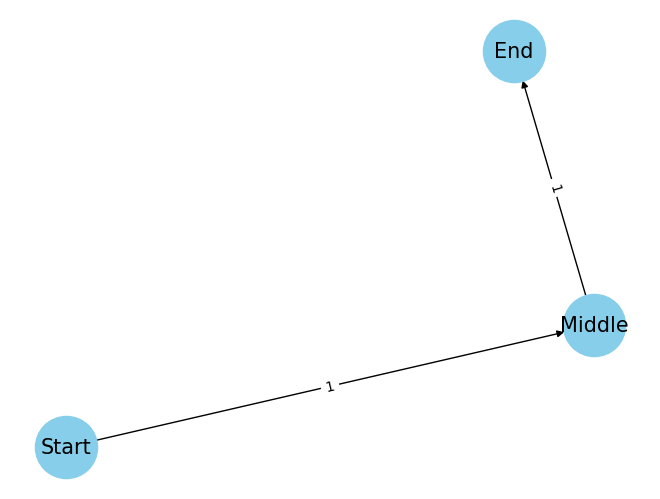

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


class ActNode:
    """ Actions as nodes """

    def __init__(self, name, pre=None, eff=None):
        self.name = name
        self.pre = pre if pre is not None else {}
        self.eff = eff if eff is not None else {}
        # A dictionary with keys representing the to action and values representing weight
        self.link_to = {}

    def add_linkneighbor(self, action):
        if action in self.link_to:
            self.link_to[action] += 1
        else:
            self.link_to[action] = 1


class Digraph:
    def __init__(self):
        self.actions = {}
        self.lastaction = None

    def add_newaction(self, name, pre=None, eff=None):
        if not self.actions:
            self.actions[name] = ActNode(name, pre, eff)
            self.lastaction = self.actions[name]
        else:
            if name not in self.actions:
                self.actions[name] = ActNode(name, pre, eff)
            self.lastaction.add_linkneighbor(name)
            self.lastaction = self.actions[name]

    def visualize_graph(self):
        G = nx.DiGraph()
        for action_name, action_node in self.actions.items():
            G.add_node(action_name)
            for neighbor, weight in action_node.link_to.items():
                G.add_edge(action_name, neighbor, weight=weight)

        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, with_labels=True, node_color='skyblue',
                node_size=2000, edge_color='black', linewidths=1, font_size=15)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()


# Example usage
graph = Digraph()
graph.add_newaction("Start")
graph.add_newaction("Middle")
graph.add_newaction("End")

graph.visualize_graph()